### Demonstrate that some variables already included in the regression are correlated with values

In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import utils.spike_utils as spike_utils
from constants.glm_constants import *
from constants.behavioral_constants import *
from spike_tools import (
    general as spike_general,
    analysis as spike_analysis,
)
import seaborn as sns


In [2]:
OUTPUT_DIR = "/data/patrick_res/glm_2"
SESSIONS_PATH = "/data/patrick_res/sessions/valid_sessions_rpe.pickle"
sessions = pd.read_pickle(SESSIONS_PATH)

### Assess number of valid trials in each session

In [3]:
def count_trials(row):
    sess_name = row.session_name
    behavior_path = SESS_BEHAVIOR_PATH.format(sess_name=sess_name)
    beh = pd.read_csv(behavior_path)
    valid_beh = behavioral_utils.get_valid_trials(beh)
    return len(valid_beh)

res = sessions.apply(count_trials, axis=1)

Text(0, 0.5, 'Count of sessions')

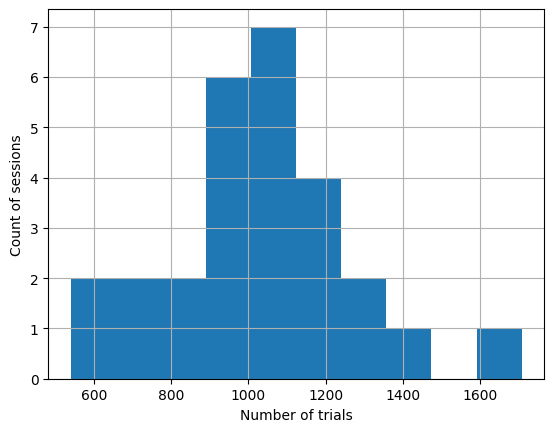

In [4]:
ax = res.hist()
ax.set_xlabel("Number of trials")
ax.set_ylabel("Count of sessions")

In [8]:
session = 20180802
behavior_path = SESS_BEHAVIOR_PATH.format(sess_name=session)
beh = pd.read_csv(behavior_path)
# filter trials 
valid_beh = behavioral_utils.get_valid_trials(beh)
feature_selections = behavioral_utils.get_selection_features(valid_beh)
valid_beh_merged = pd.merge(valid_beh, feature_selections, on="TrialNumber", how="inner")
rpe_beh = behavioral_utils.get_rpe_groups_per_session(session, valid_beh_merged)
value_beh = behavioral_utils.get_feature_values_per_session(session, rpe_beh)
value_beh["TrialIdx"] = np.arange(len(value_beh))

### Feature/Response interaction:

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.1% of the points cannot be placed; y

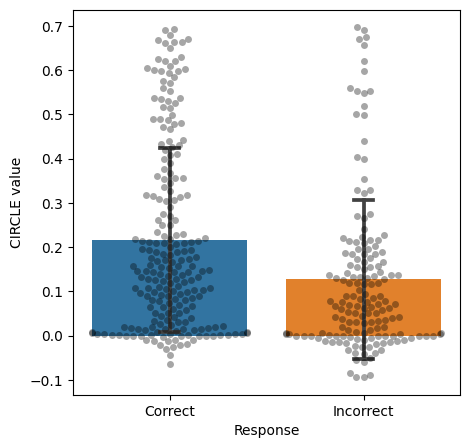

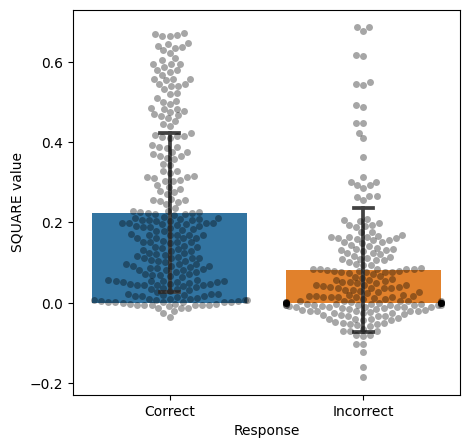

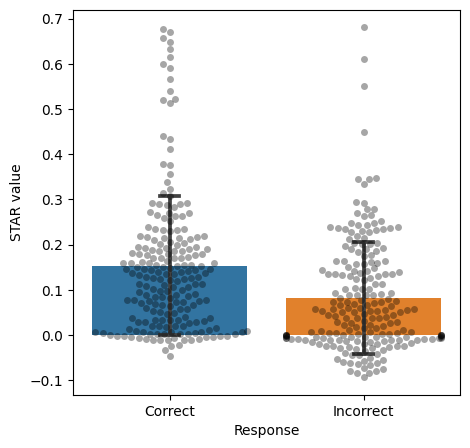

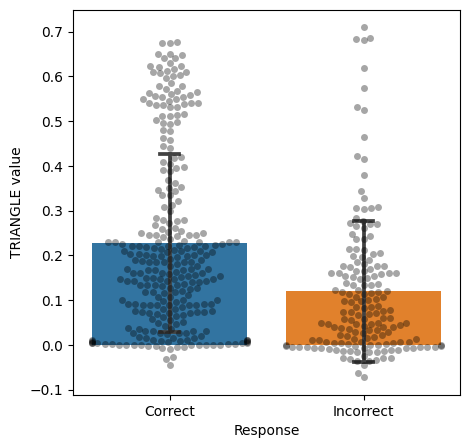

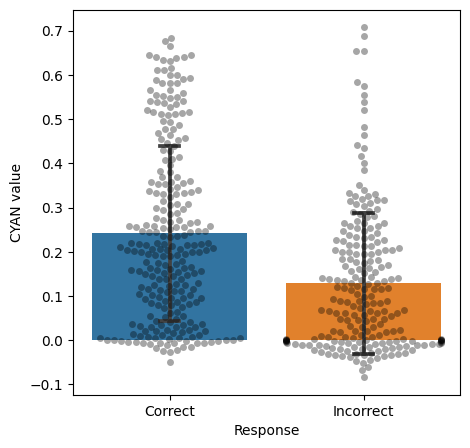

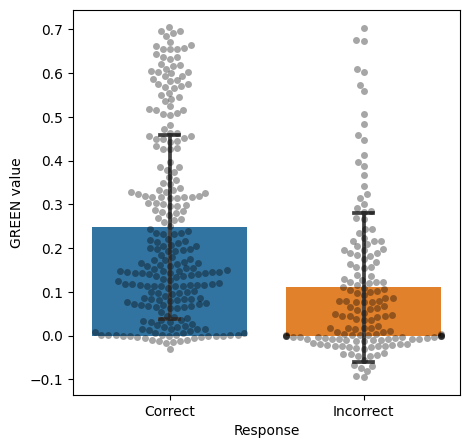

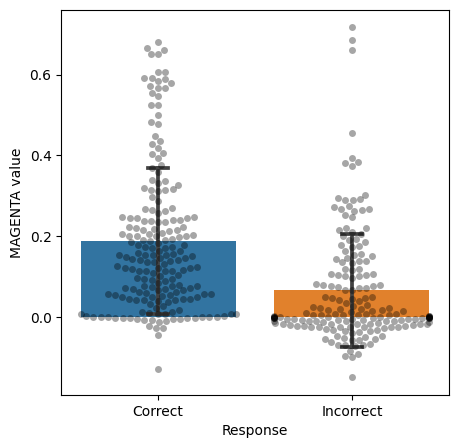

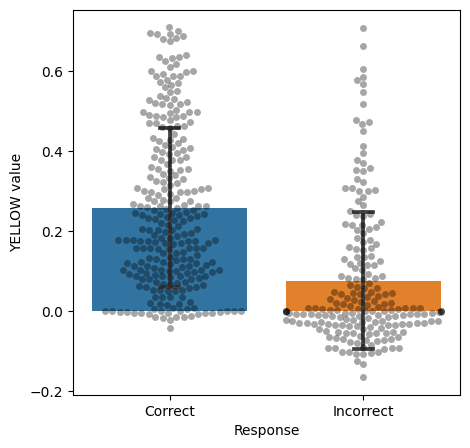

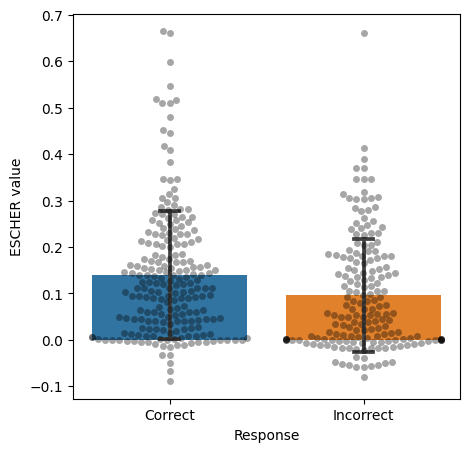

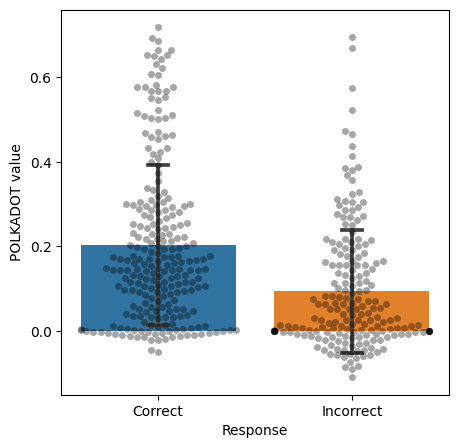

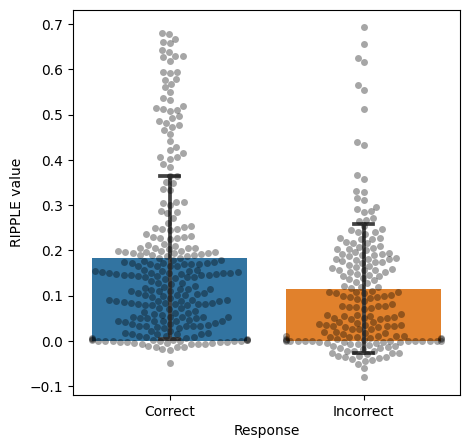

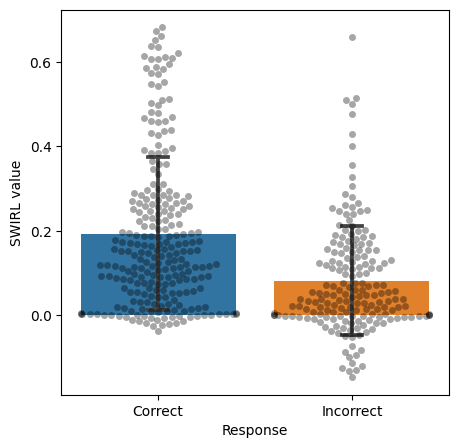

In [11]:
for feature in FEATURES:
    dim = FEATURE_TO_DIM[feature]
    beh = value_beh[value_beh[dim] == feature]
    # cor_vals = beh[beh.Response == "Correct"][feature]
    # inc_vals = beh[beh.Response == "Incorrect"][feature]
    fig, ax = plt.subplots(figsize=(5, 5))
    beh = beh.sort_values(by="Response")
    sns.barplot(data=beh, x="Response", y=feature, capsize=.1, errorbar='sd', ax=ax)
    sns.swarmplot(data=beh, x="Response", y=feature, color="0", alpha=.35, ax=ax)
    ax.set_ylabel(f"{feature} value")
    # visualization_utils.visualize_accuracy_bars([cor_vals, inc_vals], [f"{feature}Correct", f"{feature}Incorrect"], ax)

### Feature RPE Group Interaction

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 17.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.0% of the points cannot be place

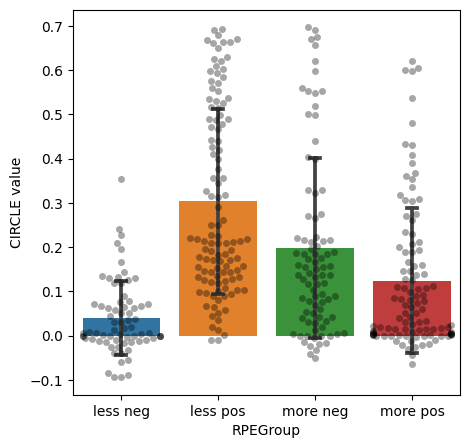

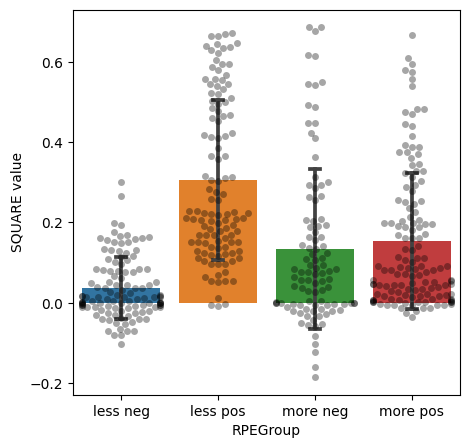

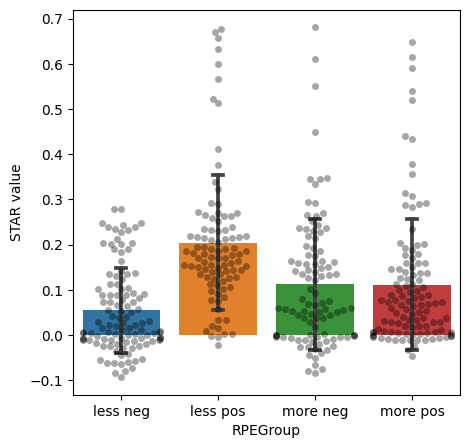

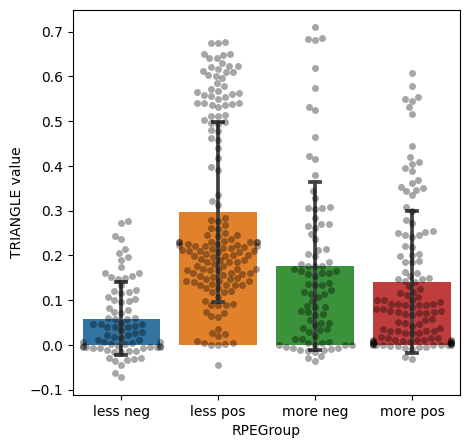

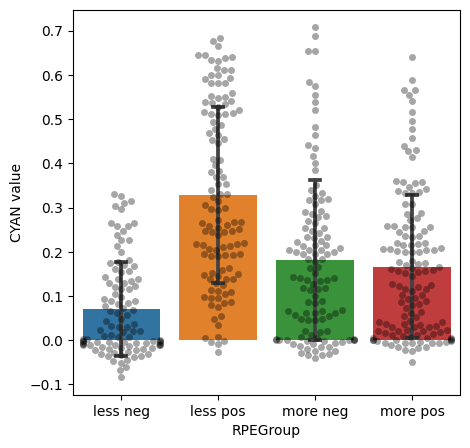

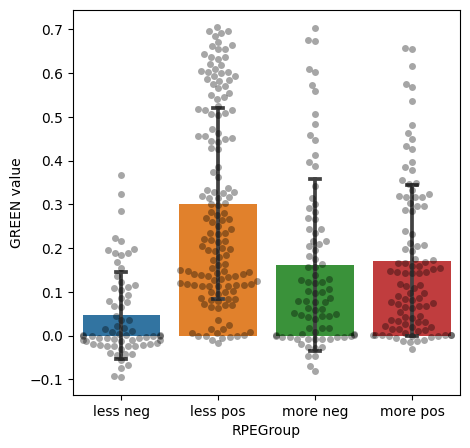

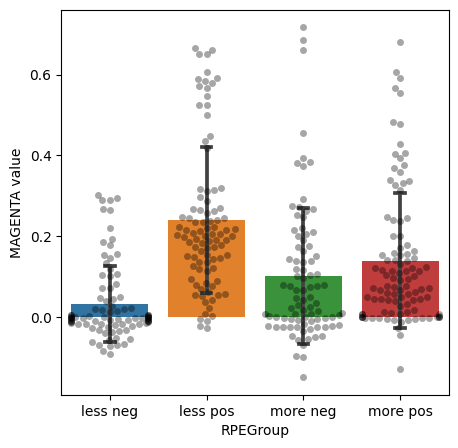

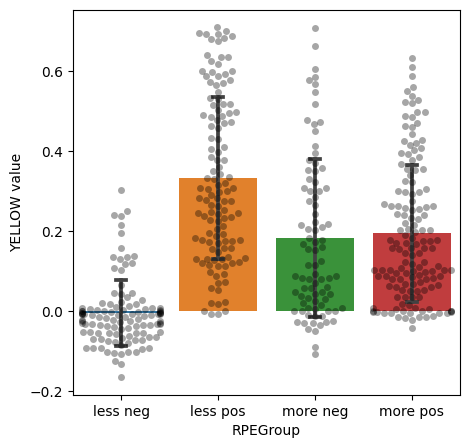

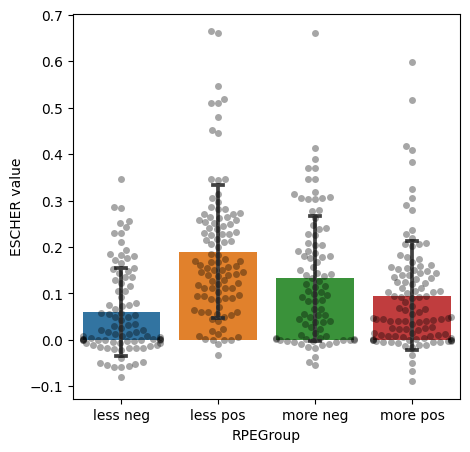

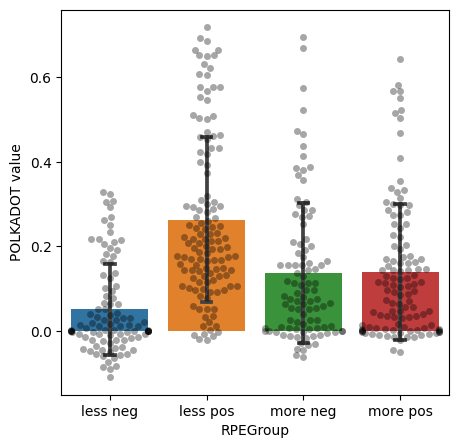

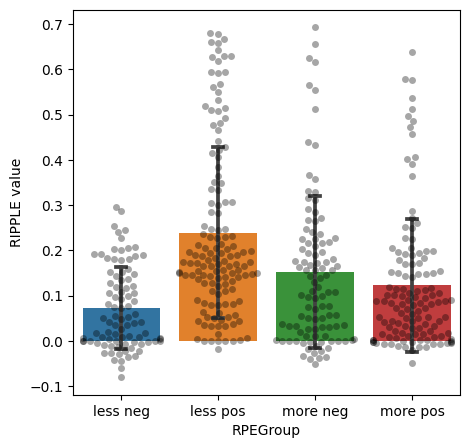

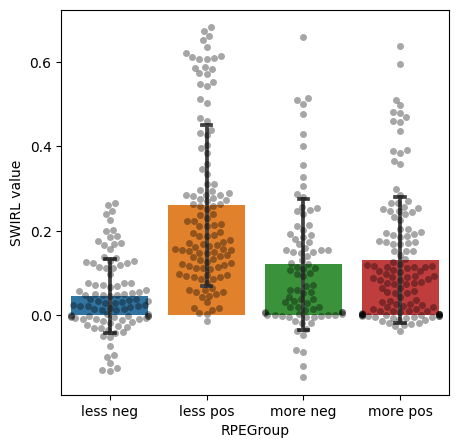

In [12]:
for feature in FEATURES:
    dim = FEATURE_TO_DIM[feature]
    beh = value_beh[value_beh[dim] == feature]
    # cor_vals = beh[beh.Response == "Correct"][feature]
    # inc_vals = beh[beh.Response == "Incorrect"][feature]
    fig, ax = plt.subplots(figsize=(5, 5))
    beh = beh.sort_values(by="RPEGroup")
    sns.barplot(data=beh, x="RPEGroup", y=feature, capsize=.1, errorbar='sd', ax=ax)
    sns.swarmplot(data=beh, x="RPEGroup", y=feature, color="0", alpha=.35, ax=ax)
    ax.set_ylabel(f"{feature} value")
    # visualization_utils.visualize_accuracy_bars([cor_vals, inc_vals], [f"{feature}Correct", f"{feature}Incorrect"], ax)